Analysis of model regression of IBM simulated data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from foqal.utils.io import IO

In [12]:
io = IO.directory(
        # folder="ibmq-simulator_bell-state_local-projections_depolarized-channel",
        # folder="2022-08-23_cross_val_dBe9",
        folder="2022-08-23_cross_val_B98e",
        include_date=False, include_id=False, verbose=False,
    )

df = io.load_dataframe("model_summary.txt")
df

,model,m,p,latent_dim,train_loss,test_loss,test_std,lr,n_steps,uid
0,ClassicalCommonCause,5,0.0,100,0.000815,0.000855,1.943095e-05,0.25,500,970455aee3cc4b28b83a829d07741dcd
1,ClassicalCommonCause,5,0.0,100,0.000842,0.000850,2.502543e-05,0.25,500,970455aee3cc4b28b83a829d07741dcd
2,ClassicalCommonCause,5,0.0,100,0.000846,0.000851,2.641898e-05,0.25,500,970455aee3cc4b28b83a829d07741dcd
3,ClassicalCommonCause,5,0.0,100,0.000873,0.000844,1.609328e-05,0.25,500,970455aee3cc4b28b83a829d07741dcd
4,ClassicalCommonCause,5,0.0,100,0.000819,0.000855,2.178902e-05,0.25,500,970455aee3cc4b28b83a829d07741dcd
...,...,...,...,...,...,...,...,...,...,...
1975,QuantumCommonCause,60,1.0,2,0.000018,0.000019,2.903546e-07,0.25,500,570dc7db949e4b6c8e89658455bb2928
1976,QuantumCommonCause,60,1.0,2,0.000019,0.000019,2.417044e-07,0.25,500,570dc7db949e4b6c8e89658455bb2928
1977,QuantumCommonCause,60,1.0,2,0.000018,0.000019,3.873924e-07,0.25,500,570dc7db949e4b6c8e89658455bb2928
1978,QuantumCommonCause,60,1.0,2,0.000019,0.000019,3.497333e-07,0.25,500,570dc7db949e4b6c8e89658455bb2928


In [13]:
models = df['model'].unique()
ms = df["m"].unique()
ps = df["p"].unique()

fig, ax = plt.subplots(1, 1)
for model in models:
    for m in ms:
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            print(len(dfi))
            training_curve = io.load_np_array(filename=f"training_curve/{}")
            ax.plot()

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


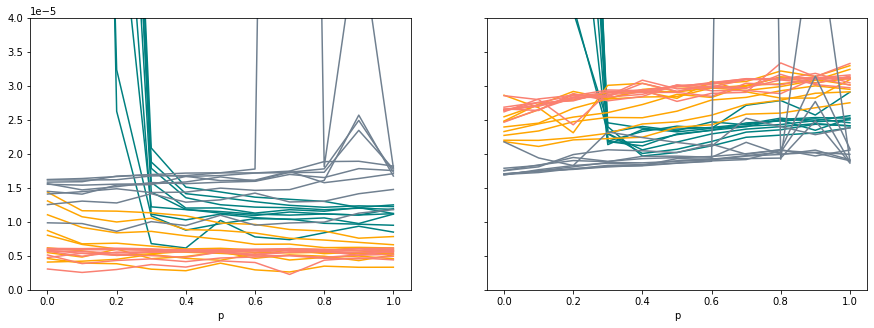

In [14]:
models = df['model'].unique()
colors = ['teal', 'orange', 'salmon', 'slategrey']

ms = df['m'].unique()
# ms = (30, )
ps = df['p'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15, 5], sharey='row')
for model, color in zip(models, colors):
    for m in ms:
        train = []
        test = []
        test_std = []
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            train.append(dfi[f'train_loss'].min())
            test.append(dfi[f'test_loss'].min())
            # test_std.append(dfi[f'test_std'].item())

        axs[0].plot(ps, train, color=color, label=f"{model}")
        axs[1].plot(ps, test, color=color)
        # axs[1].fill_between(ps, np.array(test)-np.array(test_std), np.array(test)+np.array(test_std), color=color, alpha=0.3)

# axs[0].legend()
for ax in axs:
    ax.set(xlabel='p')
    ax.set(ylim=[0, 0.00004])
    # ax.set_yscale('log')